In [1]:
from satellitecrops.data import create_Xy

X ,y = create_Xy('../data/eopatches')

Creating X and y ...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
2

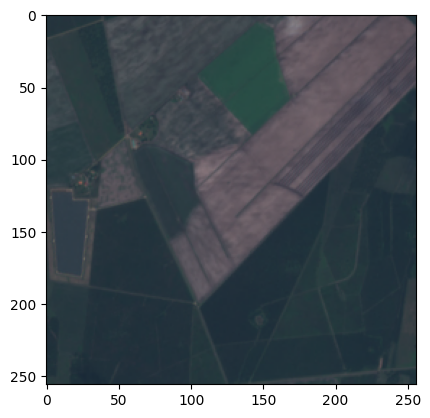

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(np.moveaxis(X[0], 0, 2));

In [8]:
np.save('my_images', np.moveaxis(X, 1, 3))

In [31]:
import os
import geopandas as gpd
import pandas as pd


loc_path = []

for root, dirs, files in os.walk('../data/eopatches'):
    for name in files:
        if name == 'bbox.geojson':
            loc_path.append(os.path.join(root, name))

loc = []
loc_bis = []

for i in range(len(loc_path)):
    loc_bis.append(gpd.read_file(loc_path[i]))

rdf = pd.concat(loc_bis, ignore_index=True, axis=0)


In [38]:
rdf.to_file('../data/dataframe.gpkg', driver='GPKG', layer='name')

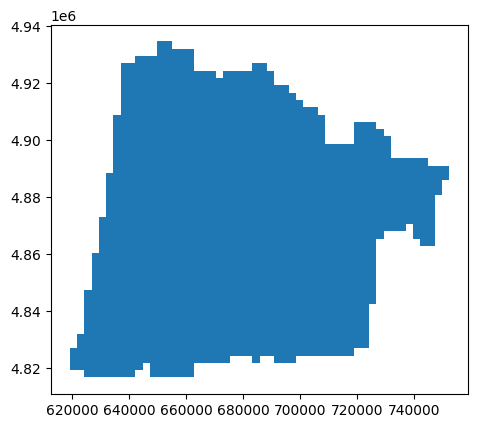

In [40]:
rdf['geometry'].plot();

In [59]:
import folium

m = folium.Map(location=[44, -1], zoom_start=8.5)

folium.GeoJson(
    data=rdf["geometry"],
    highlight_function= lambda feat: {'fillColor': 'red'}
).add_to(m)

m

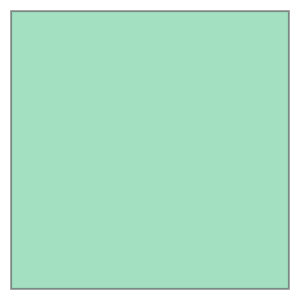

In [62]:
rdf['geometry'][0]

In [69]:
from shapely.geometry import Point, Polygon


type(rdf['geometry'][0])

shapely.geometry.polygon.Polygon

In [77]:
Point(44.09744824027576, -1.2469482421875002)
rdf.to_crs(4326)

,geometry
0,"POLYGON ((-0.45246 44.16603, -0.45147 44.18906..."
1,"POLYGON ((-0.61890 44.00829, -0.61798 44.03132..."
2,"POLYGON ((-1.33395 43.55997, -1.33332 43.58301..."
3,"POLYGON ((-0.19878 44.11399, -0.19769 44.13701..."
4,"POLYGON ((-0.63612 44.37741, -0.63519 44.40043..."
...,...
1545,"POLYGON ((-0.58137 44.14579, -0.58043 44.16881..."
1546,"POLYGON ((-1.16004 44.06438, -1.15933 44.08742..."
1547,"POLYGON ((-0.70123 44.35569, -0.70033 44.37872..."
1548,"POLYGON ((-0.58793 43.98459, -0.58699 44.00762..."


In [87]:
from google.cloud import storage
import gzip
import io

client = storage.Client()
url = 'https://storage.cloud.google.com/satellite_crops/eolearn_data/dpt/landes/my_images.npy'

blobs = client.bucket('satellite_crops').blob(f'eolearn_data/dpt/landes/BANDS_{eopatch_id}.npy.gz')

blob_data = blobs.download_as_bytes()

with gzip.GzipFile(fileobj=io.BytesIO(blob_data)) as f:
    X = np.load(f)

X.shape

(3, 256, 256)

In [88]:
y.shape

(1550, 256, 256, 1)

In [89]:
np.save('my_labels', y)

In [91]:
np.unique(y[0])

array([ 0,  2, 11, 24, 25, 28], dtype=uint8)